In [31]:
import scipy.io
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np

In [32]:
folder = 'D:\\Data analysis\\Mitography\\AA-PEX\\all_pex_results-exp12'
files = os.listdir(folder)
files = [file for file in files if file.endswith('.mat')]
files

['pex_e1_aa_c1.mat',
 'pex_e1_aa_c2.mat',
 'pex_e1_aa_c3.mat',
 'pex_e1_aa_c4.mat',
 'pex_e1_aa_c5.mat',
 'pex_e1_ct_c1.mat',
 'pex_e1_ct_c2.mat',
 'pex_e2_ct_c1.mat',
 'pex_e2_ct_c2.mat',
 'pex_e2_ct_c3.mat',
 'pex_e2_ct_c4.mat']

In [33]:
exp_all = []
ctaa_all = []
cell_all = []
area_all = []
length_all = []
width_all = []
ar_all = []
pexparam_all = []

colnames = ['exp', 'ctaa', 'cell', 'area', 'length', 'width', 'ar', 'pexparam']
# put all mito in one dataframe
data_df_all = pd.DataFrame(columns=colnames)

filenums = range(len(files))
for filenum in filenums:
    data = scipy.io.loadmat(os.path.join(folder,files[filenum]),simplify_cells=True)
    area = data['mitoinfo']['area']
    length = data['mitoinfo']['length']
    width = data['mitoinfo']['width']
    ar = data['mitoinfo']['ar']
    pexparam = data['mitoinfo']['pexparam']
    exp = np.repeat(data['mitoinfo']['exp'], len(area))
    ctaa = np.repeat(data['mitoinfo']['ctaa'], len(area))
    cell = np.repeat(filenum+1, len(area))
    exp_all.append(exp)
    ctaa_all.append(ctaa)
    area_all.append(area)
    length_all.append(length)
    width_all.append(width)
    ar_all.append(ar)
    pexparam_all.append(pexparam)
    
    # create dataframe for cell with all info per mitos
    data_df = pd.DataFrame(np.vstack((exp, ctaa, cell, area, length, width, ar, pexparam)).T, 
                           columns=colnames)
    # concat mito to all mito dataframe
    data_df_all = pd.concat([data_df_all,data_df])
# change datatypes from str to numeric (float or int) for all numeric data columns in dataframe for all mitos
data_df_all['area'] = pd.to_numeric(data_df_all['area'], downcast="float")
data_df_all['length'] = pd.to_numeric(data_df_all['length'], downcast="float")
data_df_all['width'] = pd.to_numeric(data_df_all['width'], downcast="float")
data_df_all['ar'] = pd.to_numeric(data_df_all['ar'], downcast="float")
data_df_all['pexparam'] = pd.to_numeric(data_df_all['pexparam'])
data_df_all['cell'] = pd.to_numeric(data_df_all['cell'])
# change 'control' experiment label to 'ct', if there are any, to be uniform
data_df_all = data_df_all.replace('control','ct')

In [34]:
#### all
mito_all = data_df_all
savename = 'mito_all_exp12.csv'
mito_all.to_csv(os.path.join(folder,savename), index=False)

#### ct
# all detected mitos
ct_mito_all = data_df_all[(data_df_all['ctaa'] == 'ct') | (data_df_all['ctaa'] == 'control')]
savename = 'ct_mito_all_exp12.csv'
ct_mito_all.to_csv(os.path.join(folder,savename), index=False)
# all MDMs
ct_mdm = ct_mito_all[ct_mito_all['area'] < 0.086]
savename = 'ct_mdm_exp12.csv'
ct_mdm.to_csv(os.path.join(folder,savename), index=False)
# all mitos > 0.086 µm2
ct_mito = ct_mito_all[ct_mito_all['area'] > 0.086]
savename = 'ct_mito_exp12.csv'
ct_mito.to_csv(os.path.join(folder,savename), index=False)

# all pex+ all mitos
ct_mito_all_pexp = ct_mito_all[ct_mito_all['pexparam'] == 1]
savename = 'ct_mito_all_pexp_exp12.csv'
ct_mito_all_pexp.to_csv(os.path.join(folder,savename), index=False)
# all pex- all mitos
ct_mito_all_pexn = ct_mito_all[ct_mito_all['pexparam'] == 0]
savename = 'ct_mito_all_pexn_exp12.csv'
ct_mito_all_pexn.to_csv(os.path.join(folder,savename), index=False)
# all pex+ mdms
ct_mdm_pexp = ct_mdm[ct_mdm['pexparam'] == 1]
savename = 'ct_mdm_pexp_exp12.csv'
ct_mdm_pexp.to_csv(os.path.join(folder,savename), index=False)
# all pex- mdms
ct_mdm_pexn = ct_mdm[ct_mdm['pexparam'] == 0]
savename = 'ct_mdm_pexn_exp12.csv'
ct_mdm_pexn.to_csv(os.path.join(folder,savename), index=False)
# all pex+ mitos
ct_mito_pexp = ct_mito[ct_mito['pexparam'] == 1]
savename = 'ct_mito_pexp_exp12.csv'
ct_mito_pexp.to_csv(os.path.join(folder,savename), index=False)
# all pex- mitos
ct_mito_pexn = ct_mito[ct_mito['pexparam'] == 0]
savename = 'ct_mito_pexn_exp12.csv'
ct_mito_pexn.to_csv(os.path.join(folder,savename), index=False)

#### aa
# all detected mitos
aa_mito_all = data_df_all[data_df_all['ctaa'] == 'aa']
savename = 'aa_mito_all_exp12.csv'
aa_mito_all.to_csv(os.path.join(folder,savename), index=False)
# all MDMs
aa_mdm = aa_mito_all[aa_mito_all['area'] < 0.086]
savename = 'aa_mdm_exp12.csv'
aa_mdm.to_csv(os.path.join(folder,savename), index=False)
# all mitos > 0.086 µm2
aa_mito = aa_mito_all[aa_mito_all['area'] > 0.086]
savename = 'aa_mito_exp12.csv'
aa_mito.to_csv(os.path.join(folder,savename), index=False)

# all pex+ all mitos
aa_mito_all_pexp = aa_mito_all[aa_mito_all['pexparam'] == 1]
savename = 'aa_mito_all_pexp_exp12.csv'
aa_mito_all_pexp.to_csv(os.path.join(folder,savename), index=False)
# all pex- all mitos
aa_mito_all_pexn = aa_mito_all[aa_mito_all['pexparam'] == 0]
savename = 'aa_mito_all_pexn_exp12.csv'
aa_mito_all_pexn.to_csv(os.path.join(folder,savename), index=False)
# all pex+ mdms
aa_mdm_pexp = aa_mdm[aa_mdm['pexparam'] == 1]
savename = 'aa_mdm_pexp_exp12.csv'
aa_mdm_pexp.to_csv(os.path.join(folder,savename), index=False)
# all pex- mdms
aa_mdm_pexn = aa_mdm[aa_mdm['pexparam'] == 0]
savename = 'aa_mdm_pexn_exp12.csv'
aa_mdm_pexn.to_csv(os.path.join(folder,savename), index=False)
# all pex+ mitos
aa_mito_pexp = aa_mito[aa_mito['pexparam'] == 1]
savename = 'aa_mito_pexp_exp12.csv'
aa_mito_pexp.to_csv(os.path.join(folder,savename), index=False)
# all pex- mitos
aa_mito_pexn = aa_mito[aa_mito['pexparam'] == 0]
savename = 'aa_mito_pexn_exp12.csv'
aa_mito_pexn.to_csv(os.path.join(folder,savename), index=False)

In [35]:
data_df_all

,exp,ctaa,cell,area,length,width,ar,pexparam
0,1,aa,1,0.023,0.195,0.148,0.758974,1
1,1,aa,1,0.792,1.981,0.555,0.280162,0
2,1,aa,1,0.086,0.411,0.266,0.647202,0
3,1,aa,1,0.098,0.560,0.222,0.396429,1
4,1,aa,1,0.441,1.479,0.380,0.256930,0
...,...,...,...,...,...,...,...,...
102,2,ct,11,0.105,0.553,0.241,0.435805,0
103,2,ct,11,0.951,3.085,0.392,0.127066,1
104,2,ct,11,0.001,0.056,0.028,0.500000,0
105,2,ct,11,0.148,0.495,0.382,0.771717,0


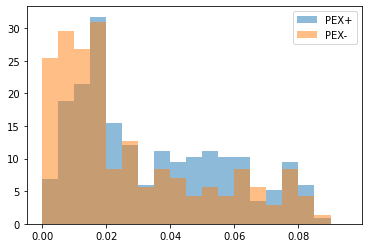

0.6213333333333333


In [36]:
bins = 10**(np.arange(-2.5, -1, 0.1, dtype='float'))
bins = np.arange(0, 0.1, 0.005)

pexp_data = ct_mdm_pexp[ct_mdm_pexp['exp']!='0']['area']
pexn_data = ct_mdm_pexn[ct_mdm_pexn['exp']!='0']['area']

plt.hist(pexp_data,bins=bins,alpha=0.5,label='PEX+',density=True)
plt.hist(pexn_data,bins=bins,alpha=0.5,label='PEX-',density=True)
plt.legend()
plt.show()

print(len(pexp_data)/(len(pexp_data)+len(pexn_data)))